### LSTM

RNN의 레이어가 깊어질수록 과거 데이터의 영향이 점점 희석되는 문제를 보완하기 위해서 LSTM(long short-term memory network)이 등장함. 

#### LSTM structure

LSTM은 전반적으로 RNN의 구조와 비슷하지만, 가운데에 LSTM 셀을 적용함. LSTM 셀은 3개의 게이트(**forget gate, input gate, output gate**)로 구성됨.  
* Forget gate : f에 의해 제어되며 장기 상태(c)의 어느 부분을 삭제할지 제어한다.  
* Input gate : i에 의해 제어되며 g의 어느 부분이 장기 상태 c에 더해져야 하는지 제어한다.  
* Output gate : o는 장기 상태 c의 어느 부분을 읽어서 h와 y로 출력해야 하는지 제어한다.  

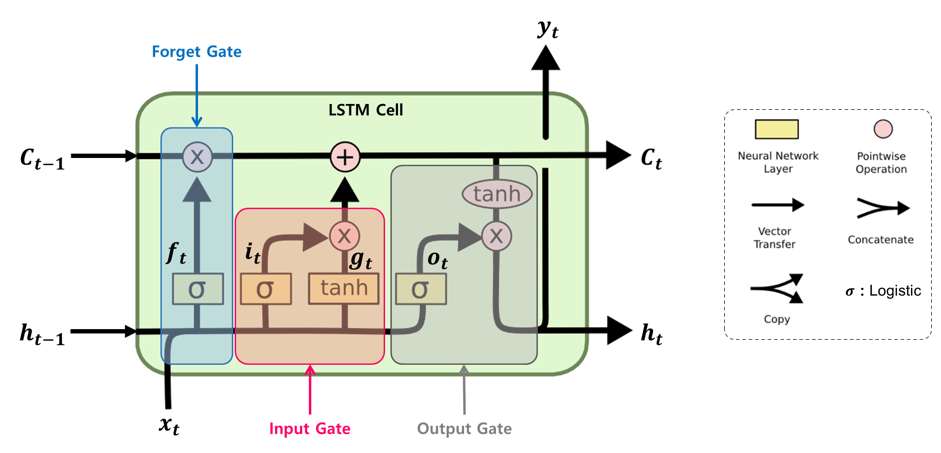

In [10]:
from IPython.display import Image
Image("C:\\Users\\user\\Desktop\\LSTM_image.png")

#### code

In [2]:
# code by Tae Hwan Jung @graykode
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
def make_batch():
    input_batch, target_batch = [], []

    for seq in seq_data:
        input = [word_dict[n] for n in seq[:-1]] # 'm', 'a' , 'k' is input
        target = word_dict[seq[-1]] # 'e' is target
        input_batch.append(np.eye(n_class)[input])
        target_batch.append(target)

    return input_batch, target_batch

In [4]:
class TextLSTM(nn.Module):
    def __init__(self):
        super(TextLSTM, self).__init__()

        self.lstm = nn.LSTM(input_size=n_class, hidden_size=n_hidden)
        self.W = nn.Linear(n_hidden, n_class, bias=False)
        self.b = nn.Parameter(torch.ones([n_class]))

    def forward(self, X):
        input = X.transpose(0, 1)  # X : [n_step, batch_size, n_class]

        hidden_state = torch.zeros(1, len(X), n_hidden)  # [num_layers(=1) * num_directions(=1), batch_size, n_hidden]
        cell_state = torch.zeros(1, len(X), n_hidden)     # [num_layers(=1) * num_directions(=1), batch_size, n_hidden]

        outputs, (_, _) = self.lstm(input, (hidden_state, cell_state))
        outputs = outputs[-1]  # [batch_size, n_hidden]
        model = self.W(outputs) + self.b  # model : [batch_size, n_class]
        return model

In [5]:
if __name__ == '__main__':
    n_step = 3 # number of cells(= number of Step)
    n_hidden = 128 # number of hidden units in one cell

    char_arr = [c for c in 'abcdefghijklmnopqrstuvwxyz']
    word_dict = {n: i for i, n in enumerate(char_arr)}
    number_dict = {i: w for i, w in enumerate(char_arr)}
    n_class = len(word_dict)  # number of class(=number of vocab)

    seq_data = ['make', 'need', 'coal', 'word', 'love', 'hate', 'live', 'home', 'hash', 'star']

    model = TextLSTM()

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    input_batch, target_batch = make_batch()
    input_batch = torch.FloatTensor(input_batch)
    target_batch = torch.LongTensor(target_batch)


C:\Users\user\AppData\Local\Temp/ipykernel_10832/4204787257.py:18: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ..\torch\csrc\utils\tensor_new.cpp:201.)
  input_batch = torch.FloatTensor(input_batch)


In [6]:
 # Training
for epoch in range(1000):
    optimizer.zero_grad()

    output = model(input_batch)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 100 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward()
    optimizer.step()

Epoch: 0100 cost = 0.496366
Epoch: 0200 cost = 0.038653
Epoch: 0300 cost = 0.009848
Epoch: 0400 cost = 0.004441
Epoch: 0500 cost = 0.002587
Epoch: 0600 cost = 0.001713
Epoch: 0700 cost = 0.001226
Epoch: 0800 cost = 0.000923
Epoch: 0900 cost = 0.000722
Epoch: 1000 cost = 0.000580


In [7]:
inputs = [sen[:3] for sen in seq_data]
predict = model(input_batch).data.max(1, keepdim=True)[1]
print(inputs, '->', [number_dict[n.item()] for n in predict.squeeze()])

['mak', 'nee', 'coa', 'wor', 'lov', 'hat', 'liv', 'hom', 'has', 'sta'] -> ['e', 'd', 'l', 'd', 'e', 'e', 'e', 'e', 'h', 'r']
